# Machine Learning:

## Linear Regression Algorithm

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [6]:
insurance_data = pd.read_csv("insurance.csv")

In [7]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Visuaize Data:

<Axes: xlabel='bmi', ylabel='charges'>

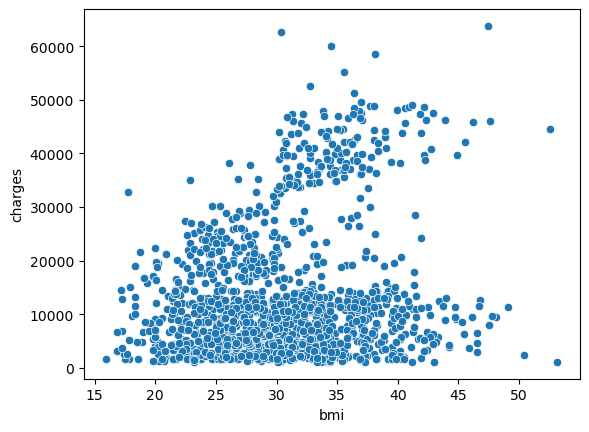

In [8]:
sns.scatterplot(x=insurance_data["bmi"], y=insurance_data["charges"])

<Axes: xlabel='bmi', ylabel='charges'>

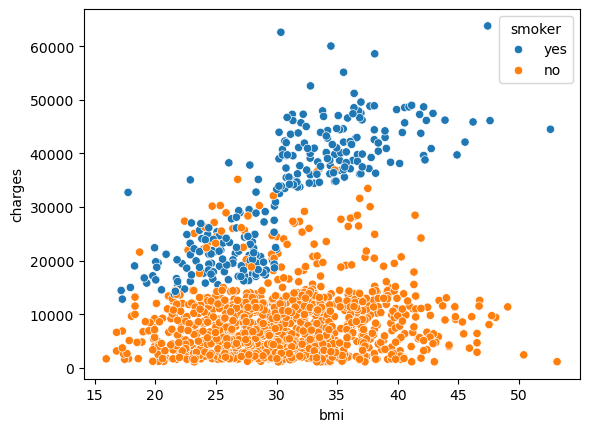

In [9]:
sns.scatterplot(
    x=insurance_data["bmi"],
    y=insurance_data["charges"],
    hue=insurance_data["smoker"]
)

In [10]:
X = insurance_data.drop(columns=["charges", "region"])
y = insurance_data["charges"]

In [11]:
X.head()
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Encoding / Mapping:

In [12]:
X["sex"] = X["sex"].map({"male":0, "female":1})
X["smoker"] = X["smoker"].map({"yes":1, "no":0})

In [13]:
X.head()

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0


## Train, Test and Split Data:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
X_train.head()

,age,sex,bmi,children,smoker
560,46,1,19.95,2,0
1285,47,1,24.32,0,0
1142,52,1,24.86,0,0
969,39,1,34.32,5,0
486,54,1,21.47,3,0


# Train Model:

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Using Model to Predict Values:

In [17]:
y_predict = model.predict(X_test)

In [18]:
y_predict

array([ 8554.81711589,  6973.58746745, 36798.60416104,  9417.88282303,
       26871.68031081, 11097.38383938,   145.27608963, 16746.1683771 ,
         747.53414191, 11153.67590722, 28518.15016561,  9292.18345421,
        5460.51975119, 38510.48013003, 40359.30938604, 37223.40538064,
       15316.56711945, 36047.50032223,  9326.29049907, 31400.1559532 ,
        4269.64414373, 10464.66374097,  2719.9260555 ,  6579.53742551,
       11232.00255515, 12472.06793446, 14807.11281089,  6066.19283362,
        9535.69029723,  2377.6983797 ,  9475.05690885, 12963.23366722,
        4706.09057393,  3414.674504  ,  4815.64981654, 12484.17176954,
        2359.13614479,  9161.02061228, 33238.67621442, 32743.41702445,
        4274.58967205,  4229.5442107 , 14435.36485176, 11384.66898976,
        8925.70468583, 12480.09178788,  5154.45787816,  3554.10047649,
       35649.60942684,  9276.25523701, 15971.35991397,  2552.75200479,
       12162.99980138,  1062.65132285, 13551.43771934, 12103.65505529,
      

In [19]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

## Evaluation Metrices:

In [20]:
# Evaluating our Model:

r2 = r2_score(y_test, y_predict)

if r2 > 0:
    print("Your ML Model is fine.")
    print(f"Value: {r2}")

Your ML Model is fine.
Value: 0.7811302113434095


In [40]:
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

if adjusted_r2 > 0:
    print("Your ML Model is fine.")
    print(f"Value: {adjusted_r2}")

Your ML Model is fine.
Value: 0.7769533069797342


In [22]:
X_test.shape

(268, 5)

# Feature Engineeting: Encoding:

## One Hot Encoding:

In [26]:
X.head()
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
X = insurance_data.drop(columns=["charges"])
y = insurance_data["charges"]

X = pd.get_dummies(X, columns=["region"], drop_first=False, dtype=int)

X["sex"] = X["sex"].map({"male":0, "female":1})
X["smoker"] = X["smoker"].map({"yes":1, "no":0})

In [31]:
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0


## Run Linear Regession Algorithm Again:

In [44]:
# Train, Test and Split Data:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Model:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation Metrics:
r2 = r2_score(y_test, y_pred)

print(f"R2 Score: {r2}")

R2 Score: 0.7835929767120723


# Dummy Variable Trap:

In [46]:
X = insurance_data.drop(columns=["charges"])
y = insurance_data["charges"]

X = pd.get_dummies(X, columns=["region"], drop_first=True, dtype=int)

X["sex"] = X["sex"].map({"male":0, "female":1})
X["smoker"] = X["smoker"].map({"yes":1, "no":0})

In [50]:
# Train, Test and Split Data:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Model:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation Metrics:
r2 = r2_score(y_test, y_pred)

print(f"R2 Score: {r2}")

R2 Score: 0.7835929767120723


In [48]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,1
1,18,0,33.770,1,0,0,1,0
2,28,0,33.000,3,0,0,1,0
3,33,0,22.705,0,0,1,0,0
4,32,0,28.880,0,0,1,0,0


In [49]:
X.sample(10)

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
1076,47,1,32.000,1,0,0,0,1
1305,24,1,27.720,0,0,0,1,0
1278,39,0,29.925,1,1,0,0,0
1293,46,0,25.745,3,0,1,0,0
675,45,0,21.375,0,0,1,0,0
523,38,1,37.730,0,0,0,1,0
65,19,1,28.900,0,0,0,0,1
501,43,0,26.030,0,0,0,0,0
1043,28,1,25.800,0,0,0,0,1
104,34,1,27.500,1,0,0,0,1


# Other Feature Engineering Features:

## Interation Features:

In [51]:
# Tracking the BMI & Age for Smokers:

X = insurance_data.drop(columns=["charges"])
y = insurance_data["charges"]

X = pd.get_dummies(X, columns=["region"], drop_first=True, dtype=int)

X["sex"] = X["sex"].map({"male":0, "female":1})
X["smoker"] = X["smoker"].map({"yes":1, "no":0})

## Adding a Feature:

In [55]:
X["age_smoker"] = X["age"] * X["smoker"]
X["bmi_smoker"] = X["bmi"] * X["smoker"]

In [56]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,age_smoker,bmi_smoker
0,19,1,27.900,0,1,0,0,1,19,27.9
1,18,0,33.770,1,0,0,1,0,0,0.0
2,28,0,33.000,3,0,0,1,0,0,0.0
3,33,0,22.705,0,0,1,0,0,0,0.0
4,32,0,28.880,0,0,1,0,0,0,0.0


In [59]:
X.sample(10)

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,age_smoker,bmi_smoker
1208,37,1,25.555,1,1,0,0,0,37,25.555
1180,42,1,41.325,1,0,0,0,0,0,0.000
318,44,1,27.645,0,0,1,0,0,0,0.000
979,36,1,29.920,0,0,0,1,0,0,0.000
628,58,0,38.000,0,0,0,0,1,0,0.000
333,56,1,28.785,0,0,0,0,0,0,0.000
1030,46,1,23.655,1,1,1,0,0,46,23.655
1053,47,0,29.800,3,1,0,0,1,47,29.800
1258,55,0,37.715,3,0,1,0,0,0,0.000
1108,26,0,30.000,1,0,0,0,1,0,0.000


# Train, Test and Split Data Model:

In [60]:
# Train, Test and Split Data:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Model:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation Metrics:
r2 = r2_score(y_test, y_pred)

print(f"R2 Score: {r2}")

R2 Score: 0.865231697953168


# Overfitting and Underfitting Model:
- The model is too complex, which is called Overfitting.
- The model is too simple, which is called Underfitting.
- r2 training is low & r2 testing is also low - underfit.
- r2 training >> r2 testing is also low - overfit.

In [61]:
y_train_pred = model.predict(X_train)
r2_traning_data = r2_score(y_train, y_train_pred)

print(f"Traning Data for r2: {r2_traning_data}")
print(f"Testing Data for r2: {r2}")

Traning Data for r2: 0.8340713711218875
Testing Data for r2: 0.865231697953168


In [62]:
insurance_data.shape

(1338, 7)

In [63]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
